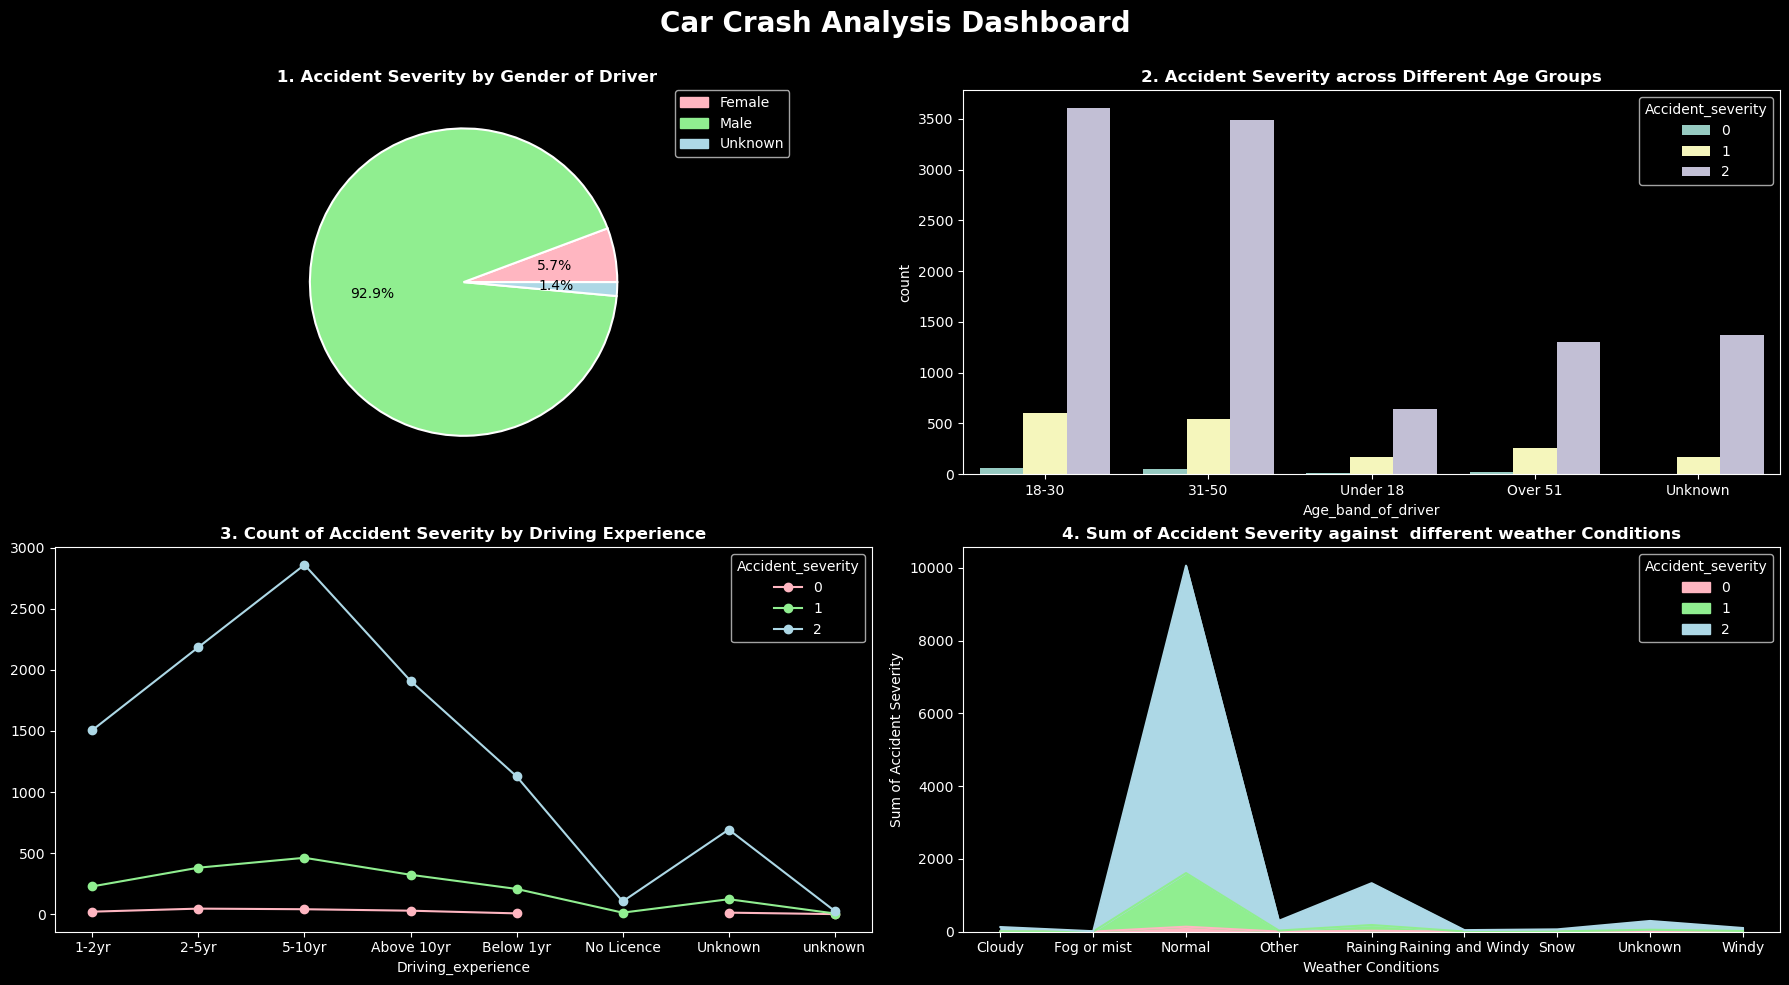

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.patches import Patch
data = pd.read_csv('cleaned.csv')
df = pd.DataFrame(data)

plt.style.use('dark_background')
fig, axs = plt.subplots(2, 2, figsize=(18, 10))

severity_by_sex = df.groupby(['Accident_severity', 'Sex_of_driver']).size().unstack()
colors = ['#FFB6C1', '#90EE90', '#ADD8E6']
sex_labels = severity_by_sex.columns
wedges, texts, autotexts = axs[0, 0].pie(severity_by_sex.sum(), labels=sex_labels, autopct='%1.1f%%',
                                          colors=colors, textprops={'color': 'black'})
axs[0, 0].set_title(' 1. Accident Severity by Gender of Driver',fontweight='bold')

for wedge in wedges:
    wedge.set_edgecolor('white')
    wedge.set_linewidth(1.5)

legend_patches = [Patch(color=color, label=label) for color, label in zip(colors, sex_labels)]
axs[0, 0].legend(handles=legend_patches, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

sns.countplot(x='Age_band_of_driver', hue='Accident_severity', data=df, ax=axs[0, 1])
axs[0, 1].set_title('2. Accident Severity across Different Age Groups',fontweight='bold')

severity_by_experience = df.groupby(['Driving_experience', 'Accident_severity']).size().unstack()
severity_by_experience.plot(kind='line', marker='o', ax=axs[1, 0], color=colors)
axs[1, 0].set_title('3. Count of Accident Severity by Driving Experience',fontweight='bold')

severity_by_weather = df.groupby(['Weather_conditions', 'Accident_severity']).size().unstack()
colors = ['#FFB6C1', '#90EE90', '#ADD8E6']
severity_by_weather = severity_by_weather.sort_index()

severity_by_weather.plot(kind='area', stacked=True, ax=axs[1, 1], color=colors)
axs[1, 1].set_title('4. Sum of Accident Severity against  different weather Conditions',fontweight='bold')
axs[1, 1].set_xlabel('Weather Conditions')
axs[1, 1].set_ylabel('Sum of Accident Severity')
fig.tight_layout()
fig.suptitle('Car Crash Analysis Dashboard', fontsize=20, fontweight='bold')
fig.subplots_adjust(top=0.9)
%matplotlib inline

plt.savefig("your-student-id.png", dpi=300)

